<a href="https://colab.research.google.com/github/JavZon/Tashkent_House_Price_Prediction/blob/main/Middle_part_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

Importing **DataFrame**

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head(2)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000


**Initial glance at df** (info, describe, isnull().sum() methods)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [4]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [5]:
df.shape

(7565, 7)

In [6]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

Values are complete and there are no NaN values in our dataset

But size and price columns are **object** (str) type and we change them to numeric type with the help of **astype()** method

In [7]:
print(df.at[32,'size'])
type(df.at[32,'size'])  # as we can see the type of value is str

42


str

There is value called - 'Площадьземли:1сот'  at 5347 index which means 100 (kv.m). We will change it

In [8]:
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


In [9]:
df[df['size']=='Площадьземли:1сот']  # as we can see it is in 5347 index
df.at[5347, 'size']=100

In [10]:
df['size']=df['size'].astype(float)  # we changed the type of 'size' column

In [11]:
df.info()  # 'size' column has been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 413.8+ KB


But there are extraordinary values in **'size'** column

We can see it through **hist** graph

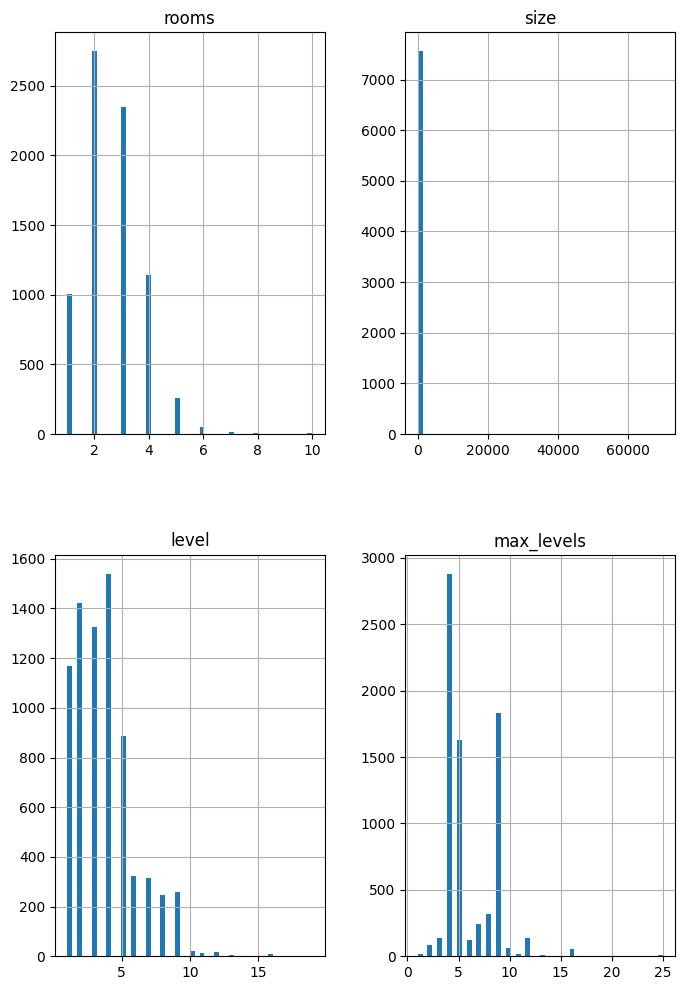

In [12]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df.hist(bins=50, figsize=(8,12))
plt.show()

In [13]:
df['rooms'].value_counts()

rooms
2     2746
3     2344
4     1140
1     1003
5      261
6       47
7       13
8        6
10       5
Name: count, dtype: int64

In [14]:
df['level'].value_counts()

level
4     1540
2     1422
3     1325
1     1168
5      887
6      324
7      315
9      258
8      248
10      22
12      19
11      15
16       9
13       6
18       2
14       2
15       2
19       1
Name: count, dtype: int64

In [15]:
df['max_levels'].value_counts()

max_levels
4     2880
9     1833
5     1631
8      321
7      240
12     136
3      134
6      119
2       84
10      66
16      52
11      20
1       16
13       8
25       6
18       5
17       5
23       4
19       2
22       1
14       1
20       1
Name: count, dtype: int64

In [16]:
df['district'].value_counts()

district
Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: count, dtype: int64

We will check **duplicate** values.

In [17]:
df.duplicated().sum()

700

We will **drop** duplicate values

In [18]:
df.drop_duplicates(inplace=True)  # we dropped duplicate rows which were 700

In [19]:
df.shape

(6865, 7)

We will check highest points of 'size' column

In [20]:
df[df['size'] > 499]

,location,district,rooms,size,level,max_levels,price
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500
2268,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,1,24500.0,2,5,24500
2547,"город Ташкент, Юнусабадский район, Киёт",Юнусабадский,3,70000.0,2,4,76000
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,3448.0,5,5,25000
3089,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,2,44000.0,3,4,44000
4089,"город Ташкент, Шайхантахурский район, Актепа",Шайхантахурский,6,500.0,2,2,1800
4615,"город Ташкент, Олмазорский район, Метро Тынчлик",Олмазорский,4,69000.0,3,4,69000
4784,"город Ташкент, Мирабадский район, Массив Куйлюк1",Мирабадский,3,7359.0,2,4,46500
5456,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,3,67000.0,2,5,67000
7043,"город Ташкент, Олмазорский район, Олмазорский ...",Олмазорский,4,7407.0,4,4,44000


As we can see, size higher than 500 makes no sense. So we will drop size which is higher than 499

In [21]:
df = df[df['size'] < 499]

In [22]:
df.shape

(6854, 7)

We will check 'size' column for small size numbers **(size<20)**

In [23]:
df[df['size'] < 18]

,location,district,rooms,size,level,max_levels,price
195,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,11.0,3,9,7500
739,"город Ташкент, Мирзо-Улугбекский район, Мирзо-...",Мирзо-Улугбекский,1,16.0,1,4,18000
745,"город Ташкент, Мирзо-Улугбекский район, хирот ...",Мирзо-Улугбекский,1,16.0,1,4,18000
796,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,2,5.0,1,4,50000
1241,"город Ташкент, Чиланзарский район, Наккашлык",Чиланзарский,1,17.0,5,9,12000
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.0,6,9,45000
2147,"город Ташкент, Учтепинский район, Куксарой",Учтепинский,8,8.5,2,2,230000
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.0,1,1,50000
2653,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,1,17.0,2,4,17000
2654,"город Ташкент, Яшнободский район, Мухтара Ашрафи",Яшнободский,1,14.0,1,1,10600


In fact, there are almost no houses smaller than **18 square meters**. Some houses have an area of **​​15 square meters** but 3 rooms, which is logically incorrect. Therefore, we also remove houses with an area of ​​less than **18 square meters**.

In [24]:
df=df[df['size'] > 17.9]

In [25]:
df.shape

(6832, 7)

Now we will check our **'size'** column via **histplot**

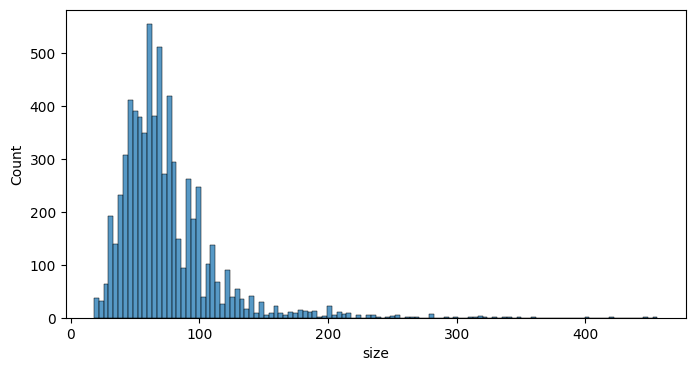

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='size')
plt.show()

In [27]:
df.describe()

,rooms,size,level,max_levels
count,6832.000000,6832.000000,6832.000000,6832.000000
mean,2.627196,73.698350,3.717506,6.063964
std,1.071412,37.145714,2.257951,2.625591
min,1.000000,18.000000,1.000000,1.000000
25%,2.000000,50.000000,2.000000,4.000000
50%,3.000000,67.000000,3.000000,5.000000
75%,3.000000,86.000000,5.000000,9.000000
max,10.000000,456.000000,19.000000,25.000000


Now we can see that our **'size'** column returned to normal distribution

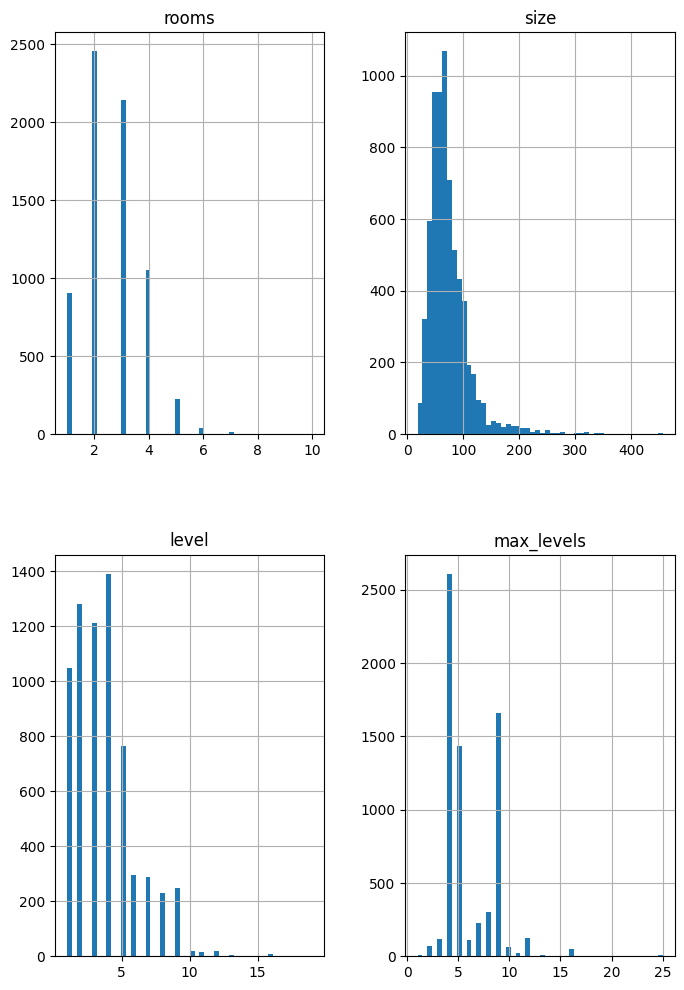

In [28]:
df.hist(bins=50, figsize=(8,12))
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6832 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6832 non-null   object 
 1   district    6832 non-null   object 
 2   rooms       6832 non-null   int64  
 3   size        6832 non-null   float64
 4   level       6832 non-null   int64  
 5   max_levels  6832 non-null   int64  
 6   price       6832 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 427.0+ KB


Now as we can see from the info **'price'** column is object type. Therefore we will change it to numeric. This to_numeric method will convert values to numeric values. If there is non-numeric values they will be converted to **'NaN'**.

In [30]:
df['price'] = df['price'].str.strip()  # Remove leading/trailing whitespace
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [31]:
df.shape

(6832, 7)

Now we check if **'price'** column has been changed from object type to float

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6832 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6832 non-null   object 
 1   district    6832 non-null   object 
 2   rooms       6832 non-null   int64  
 3   size        6832 non-null   float64
 4   level       6832 non-null   int64  
 5   max_levels  6832 non-null   int64  
 6   price       6736 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 427.0+ KB


We will check whether there are NaN values or not

In [33]:
df[df['price'].isna()]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,NaN
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,NaN
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,NaN
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,NaN
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,NaN
...,...,...,...,...,...,...,...
6954,"город Ташкент, Шайхантахурский район, Ташкент ...",Шайхантахурский,3,114.0,5,7,NaN
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,NaN
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,NaN
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,NaN


Now we will check our **'price'** column via **histplot**

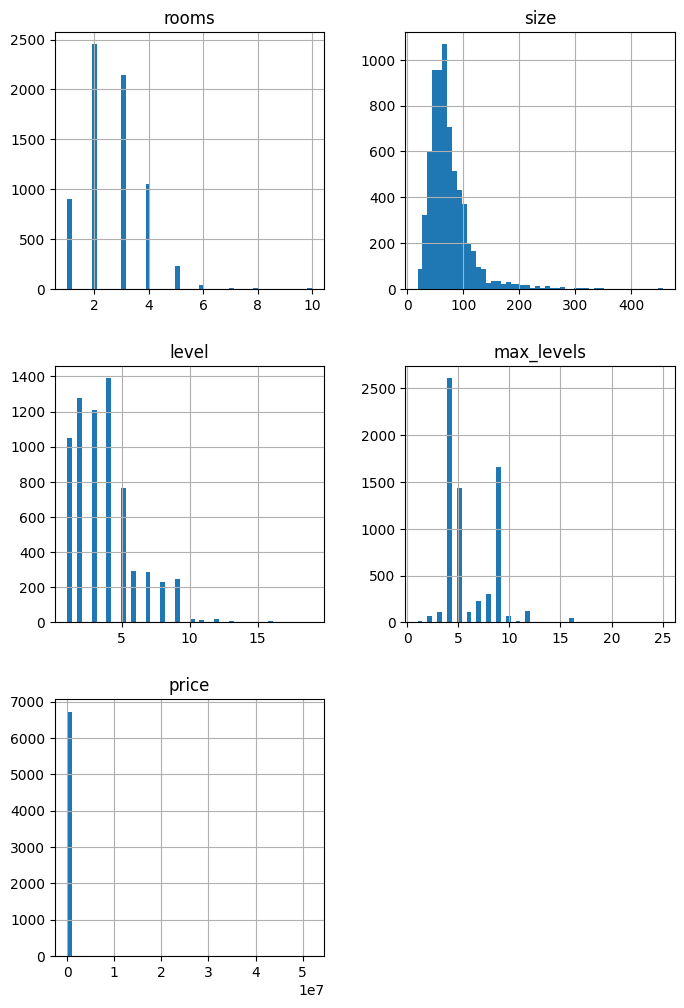

In [34]:
df.hist(bins=50, figsize=(8,12))
plt.show()

It is clear from the plot there is something wrong with values. We will check if prices over **550.000** make sense or not

In [35]:
df[df['price']>550000]

,location,district,rooms,size,level,max_levels,price
330,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,2,68.0,5,8,1666000.0
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000.0
1744,"город Ташкент, Олмазорский район, Toshmi",Олмазорский,3,84.0,1,5,3780000.0
4935,"город Ташкент, Чиланзарский район, Катта козир...",Чиланзарский,1,28.0,3,4,644000.0
5903,"город Ташкент, Учтепинский район, Chtepa Fozil...",Учтепинский,4,72.0,2,5,52000000.0
6133,"город Ташкент, Юнусабадский район, город Ташке...",Юнусабадский,3,42.0,3,4,1344000.0
6517,"город Ташкент, Юнусабадский район, Юнусабад 5к...",Юнусабадский,3,80.0,8,9,4240000.0
6952,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,3,114.0,5,7,15504000.0
7081,"город Ташкент, Чиланзарский район, Тирсакобод",Чиланзарский,2,85.0,2,3,6630000.0
7296,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,96.0,2,5,5568000.0


As we can see, the prices are sky high. For example, a 2-bedroom house is **1,470,000**and a 4-bedroom house is **$52 million** in total. That's why we remove houses priced above 550,000

In [36]:
df=df[(df['price'].isna())|(df['price']<550000)]  # Bu usulni yozib ol

In [37]:
df.shape

(6821, 7)

Now it's time to check the **small values**

In [38]:
df[df['price']<=11000]

,location,district,rooms,size,level,max_levels,price
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000.0
3087,"город Ташкент, Яшнободский район, Машиносозлар",Яшнободский,1,18.0,2,4,11000.0
3635,"город Ташкент, Мирзо-Улугбекский район, Массив...",Мирзо-Улугбекский,1,18.0,4,4,10000.0
3832,"город Ташкент, Яккасарайский район, Абдуллы Ка...",Яккасарайский,4,170.0,2,6,2000.0
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864.0
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000.0
6055,"город Ташкент, Мирзо-Улугбекский район, Улица ...",Мирзо-Улугбекский,1,18.0,6,9,10500.0
7031,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,18.0,1,4,10500.0
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2.0


In [39]:
len(df[df['price']<=11000])

13

It is seen from the dataframe that house whose prices lower than **10000$** do not make sense. So we will drop them too

In [40]:
df=df[(df['price'].isna())|(df['price']>=10000)]

In [41]:
df.shape

(6814, 7)

Now We check our **'price'** column after changes via **histplot**

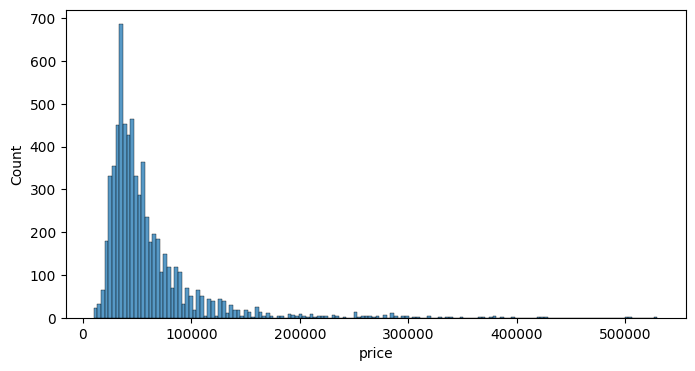

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='price')
plt.show()

In [43]:
df.describe()

,rooms,size,level,max_levels,price
count,6814.000000,6814.000000,6814.000000,6814.000000,6718.000000
mean,2.625037,73.569875,3.719401,6.066481,59113.266895
std,1.066067,36.605097,2.258422,2.626930,44153.170871
min,1.000000,18.000000,1.000000,1.000000,10000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,67.000000,3.000000,5.000000,46650.000000
75%,3.000000,86.000000,5.000000,9.000000,67000.000000
max,10.000000,456.000000,19.000000,25.000000,530000.000000


It is time to work with **NaN** values

In [44]:
df[df['price'].isna()]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,NaN
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,NaN
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,NaN
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,NaN
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,NaN
...,...,...,...,...,...,...,...
6954,"город Ташкент, Шайхантахурский район, Ташкент ...",Шайхантахурский,3,114.0,5,7,NaN
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,NaN
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,NaN
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,NaN


We will save indeces of NaN values separately to **nan_indexes**

In [145]:
nan_indexes=df[df['price'].isna()].index
nan_indexes # we can see the indexes of NaN

Index([ 202,  411,  439,  460,  507,  521,  522,  523,  800,  873,  880,  882,
        883,  886,  892,  988, 1027, 1318, 1541, 1601, 1804, 1805, 2004, 2006,
       2580, 2625, 2673, 2705, 2797, 2894, 2942, 3431, 3436, 3454, 3455, 3456,
       3470, 3495, 3510, 3528, 3536, 3572, 3574, 3589, 3605, 3637, 3677, 3711,
       3712, 3713, 3714, 4061, 4158, 4188, 4278, 4298, 4328, 4361, 4420, 4425,
       4453, 4659, 4746, 4747, 4879, 5002, 5003, 5004, 5105, 5637, 5801, 5838,
       5848, 5887, 5920, 6099, 6542, 6602, 6603, 6604, 6605, 6606, 6607, 6608,
       6639, 6662, 6738, 6819, 6836, 6843, 6859, 6954, 7039, 7196, 7323, 7403],
      dtype='int64')

We group **'district','rooms'** columns using **groupby** method and find **'mean'** of the **price** column using **transform. Transform** method finds 'mean' of the groupby method and place accordingly to each group

In [144]:
data1=df.groupby(['district','rooms'])['price'].transform('mean')
data1

0       70462.228448
1       53903.009050
2       37929.184348
3       55109.983721
4       55109.983721
            ...     
7560    21749.378788
7561    40490.297619
7562    47756.552632
7563    26628.880000
7564    26465.788927
Name: price, Length: 6814, dtype: float64

Then we set the indices corresponding to NaN in **df** to the values ​​in **data1**

In [146]:
df.loc[nan_indexes,'price']=data1

Then we check if our code worked or not

In [149]:
df.loc[nan_indexes]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,89485.642857
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,114487.258824
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,70407.515235
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,55109.983721
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,40490.297619
...,...,...,...,...,...,...,...
6954,"город Ташкент, Шайхантахурский район, Ташкент ...",Шайхантахурский,3,114.0,5,7,64208.198630
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,21749.378788
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,37929.184348
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,208333.333333


In [148]:
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [150]:
df.describe()

,rooms,size,level,max_levels,price
count,6814.000000,6814.000000,6814.000000,6814.000000,6813.000000
mean,2.625037,73.569875,3.719401,6.066481,59133.700937
std,1.066067,36.605097,2.258422,2.626930,43973.878654
min,1.000000,18.000000,1.000000,1.000000,10000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,67.000000,3.000000,5.000000,47000.000000
75%,3.000000,86.000000,5.000000,9.000000,67000.000000
max,10.000000,456.000000,19.000000,25.000000,530000.000000


Now we check if there are any NaN values ​​left

In [151]:
df.isnull().sum()   # there is only 1 NaN left, so we drop it

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         1
dtype: int64

In [152]:
df[df['price'].isna()]

,location,district,rooms,size,level,max_levels,price
3712,"город Ташкент, Сергелийский район, Sergeli 5",Сергелийский,7,170.0,1,4,NaN


In [153]:
df.dropna(inplace=True)

In [154]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

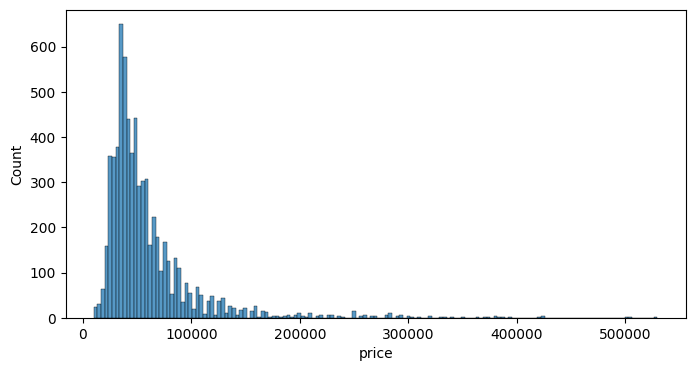

In [156]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='price')
plt.show()

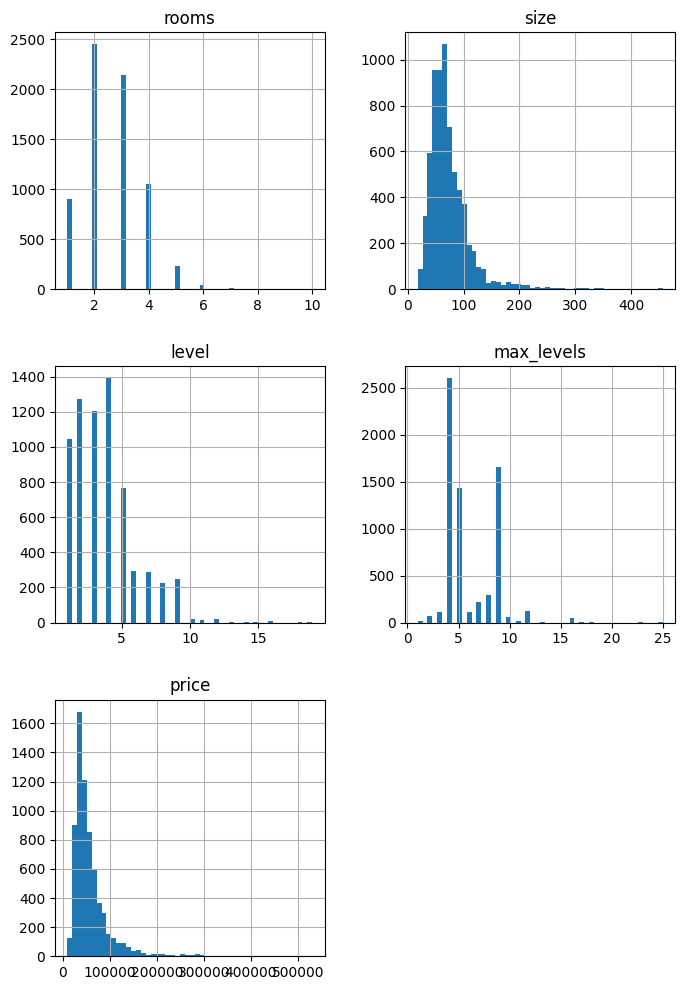

In [157]:
df.hist(bins=50, figsize=(8,12))
plt.show()

Now it is time to **correlation** and **comparision**

In [159]:
df2=df[['rooms','size','level','max_levels','price']]

In [161]:
df2.corrwith(df2['price']).sort_values(ascending=False)

price         1.000000
size          0.791328
rooms         0.558757
max_levels    0.233476
level         0.067159
dtype: float64

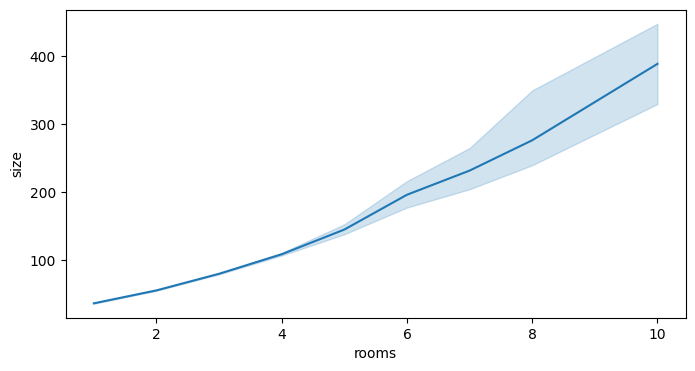

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df2, x='rooms', y='size')
plt.show()

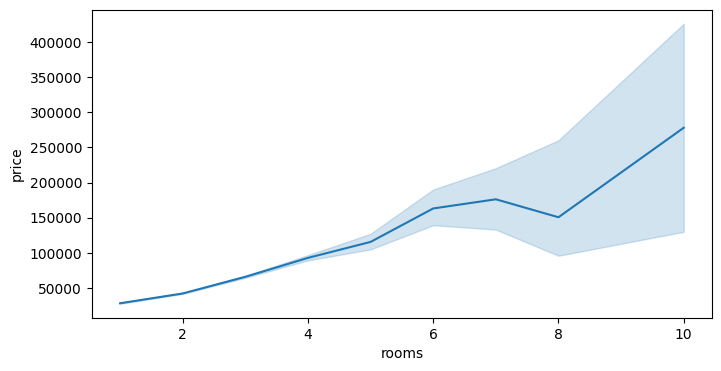

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df2, x='rooms', y='price')
plt.show()

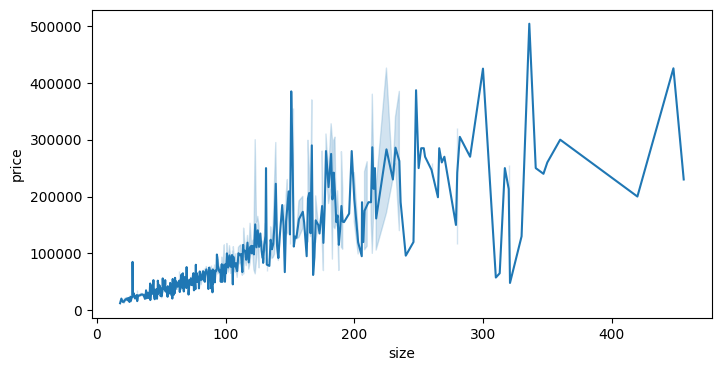

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df2, x='size', y='price')
plt.show()